Type de problème : Regression 

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Première phase : Exploration

In [174]:
data = pd.read_csv("data/housing.csv")

In [175]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


On voit qu'il y a peu de données manquantes (environ 200 dans la feature total_bedrooms) et nous
allons faire le choix de supprimer ces 200 lignes afin de garder des données 100% viables.

In [177]:
data_clean = data.dropna().copy()
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

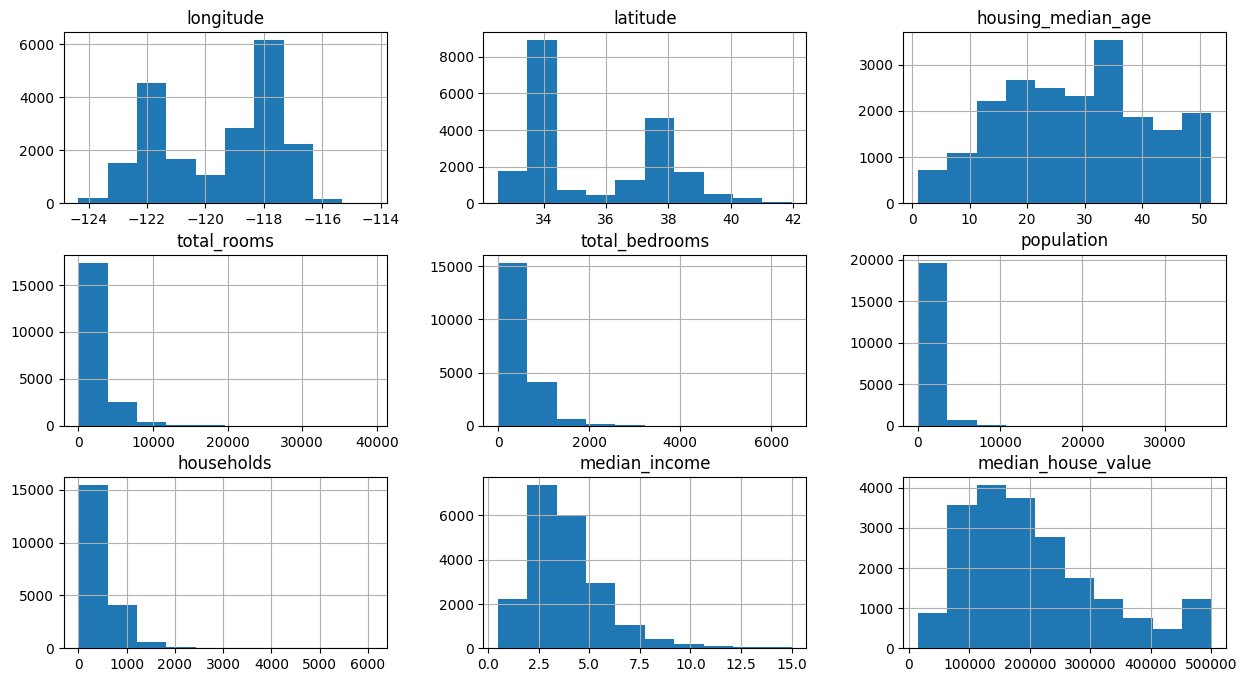

In [178]:
data_clean.hist(figsize=(15,8))

<Axes: >

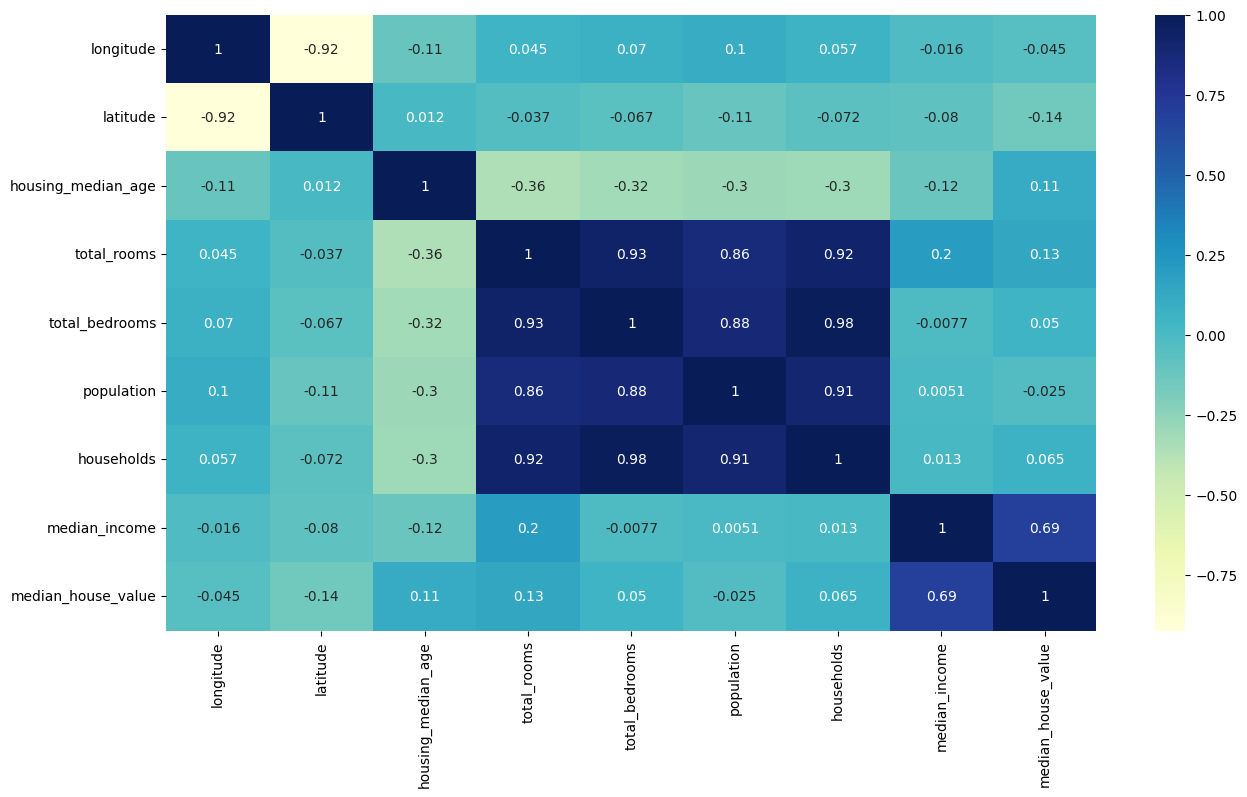

In [179]:
data_clean_heatmap = data_clean.drop(['ocean_proximity'], axis=1)
plt.figure(figsize=(15,8))
sns.heatmap(data_clean_heatmap.corr(), annot=True, cmap="YlGnBu")


On voit que le revenu des ménages est fortement corrélé avec la valeur médiane des maisons.
Je pense aussi que la proximité des maisons avec la mer joue un rôle important dans la valeur médiane mais à ce stade je n'ai pas encore traité cette information.

Nous remarquons que beaucoups de features ont une répartition assymétrique de type log-normale, nous allons donc prendre le logarithme de ces caractéristiques afin d'avoir une répartition en clôche (écraser les grandes valeurs et étaler les petites)

In [180]:
data_clean.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [181]:
data_clean = data_clean.join(pd.get_dummies(data_clean.ocean_proximity).astype(int)).drop(['ocean_proximity'], axis=1)

In [182]:
data_clean

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


In [183]:
data_clean['total_rooms'] = np.log(data_clean['total_rooms']+1)
data_clean['total_bedrooms'] = np.log(data_clean['total_bedrooms']+1)
data_clean['population'] = np.log(data_clean['population']+1)
data_clean['households'] = np.log(data_clean['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>],
       [<Axes: title={'center': 'NEAR BAY'}>,
        <Axes: title={'center': 'NEAR OCEAN'}>, <Axes: >, <Axes: >]],
      dtype=object)

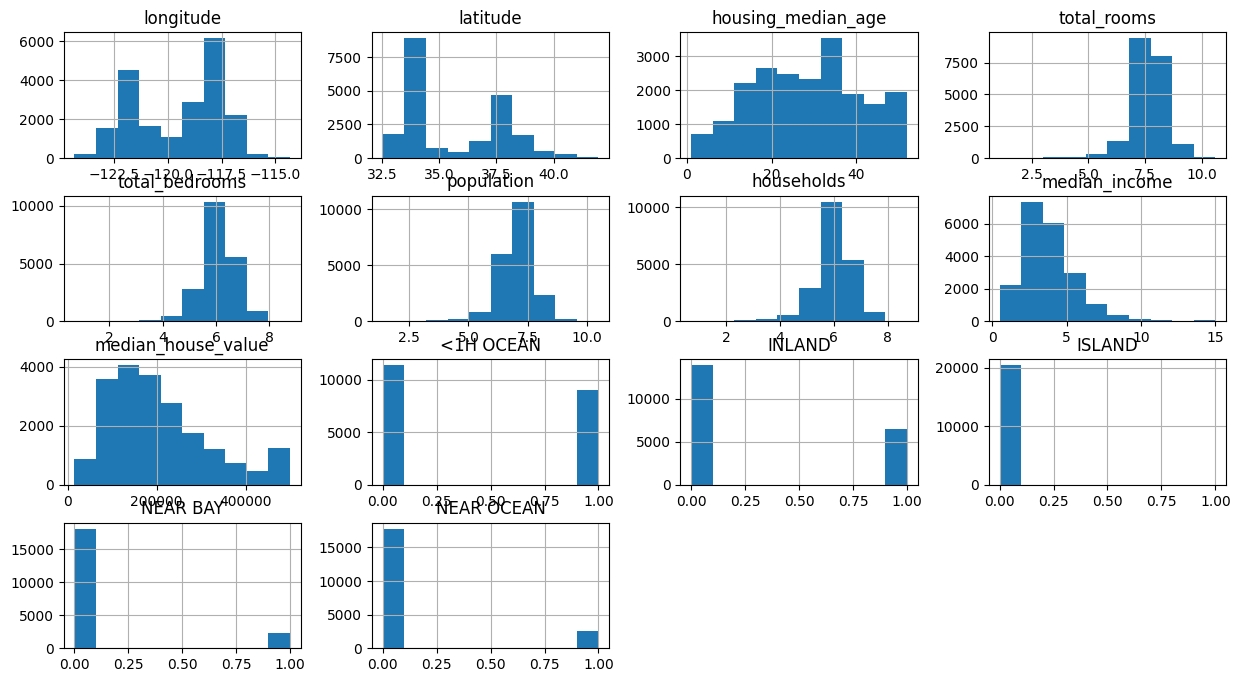

In [184]:
data_clean.hist(figsize=(15,8))

<Axes: >

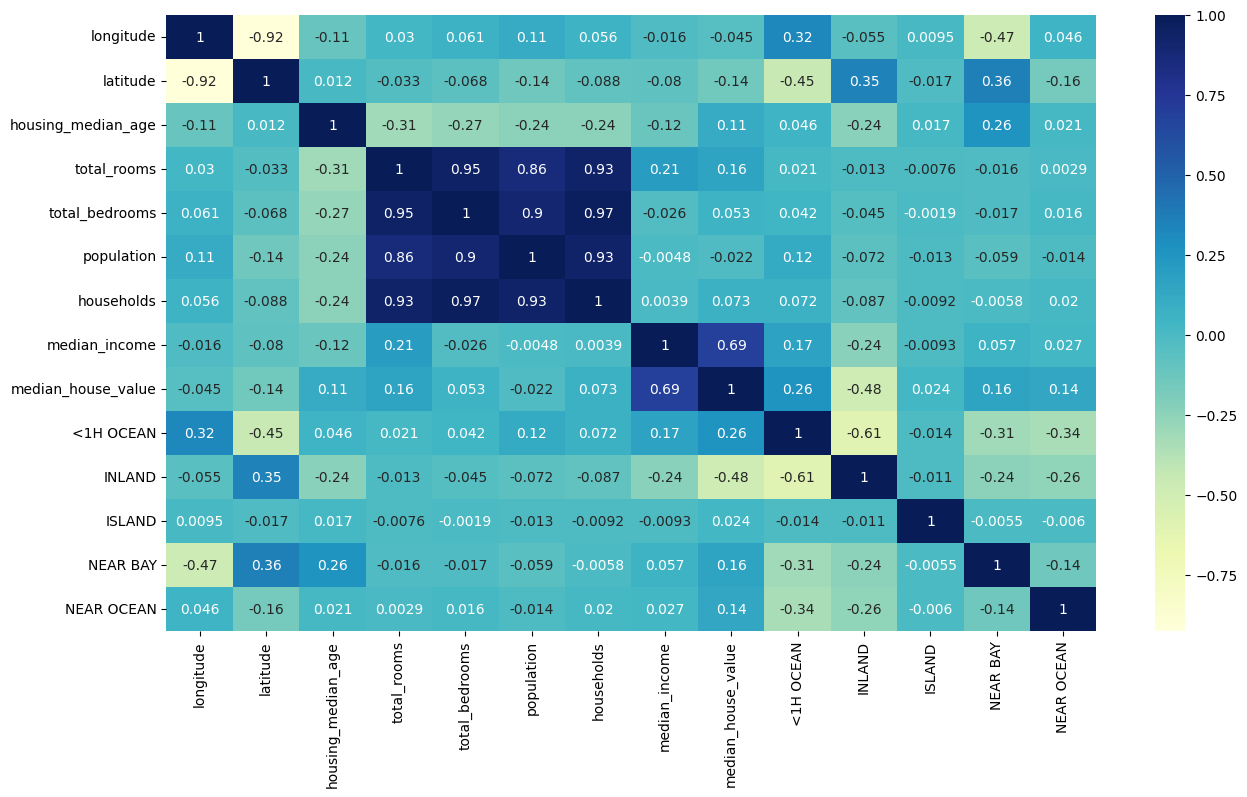

In [185]:
plt.figure(figsize=(15,8))
sns.heatmap(data_clean.corr(), annot=True, cmap="YlGnBu")

Nous pouvons remarquer que les features 'median_house_value' et 'inland' sont fortement inversement corrélées ce qui indique que plus une maison est loin de l'océan moins elle a de valeur.

<Axes: xlabel='latitude', ylabel='longitude'>

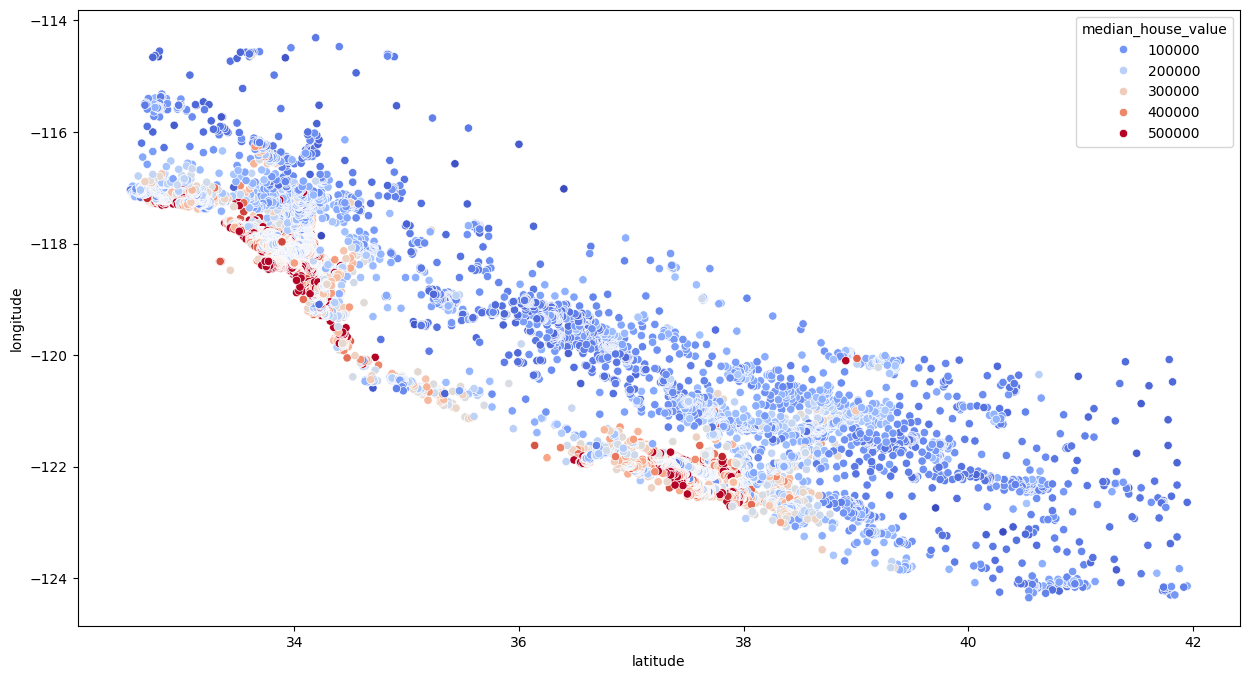

In [186]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=data_clean, hue='median_house_value', palette='coolwarm')

Une chose intéressante à faire ici et de se servir de la logitude et de la latitude pour regarder à l'aide d'un nuage de point la cartographie de la californie. On voit d'ailleurs que plus les maisons sont proches de l'océan plus le prix est élevé.

Nous pouvons aussi ajouter de nouvelles features, en particulier le ratio du nombre de chambre par nombre de pièces ainsi que le ratio du nombre de pièces par nombre d'habitants du ménage : 

In [187]:
data_clean['bedroom_ratio'] = data_clean['total_bedrooms']/data_clean['total_rooms']
data_clean['household_rooms'] = data_clean['total_rooms']/data_clean['households']

<Axes: >

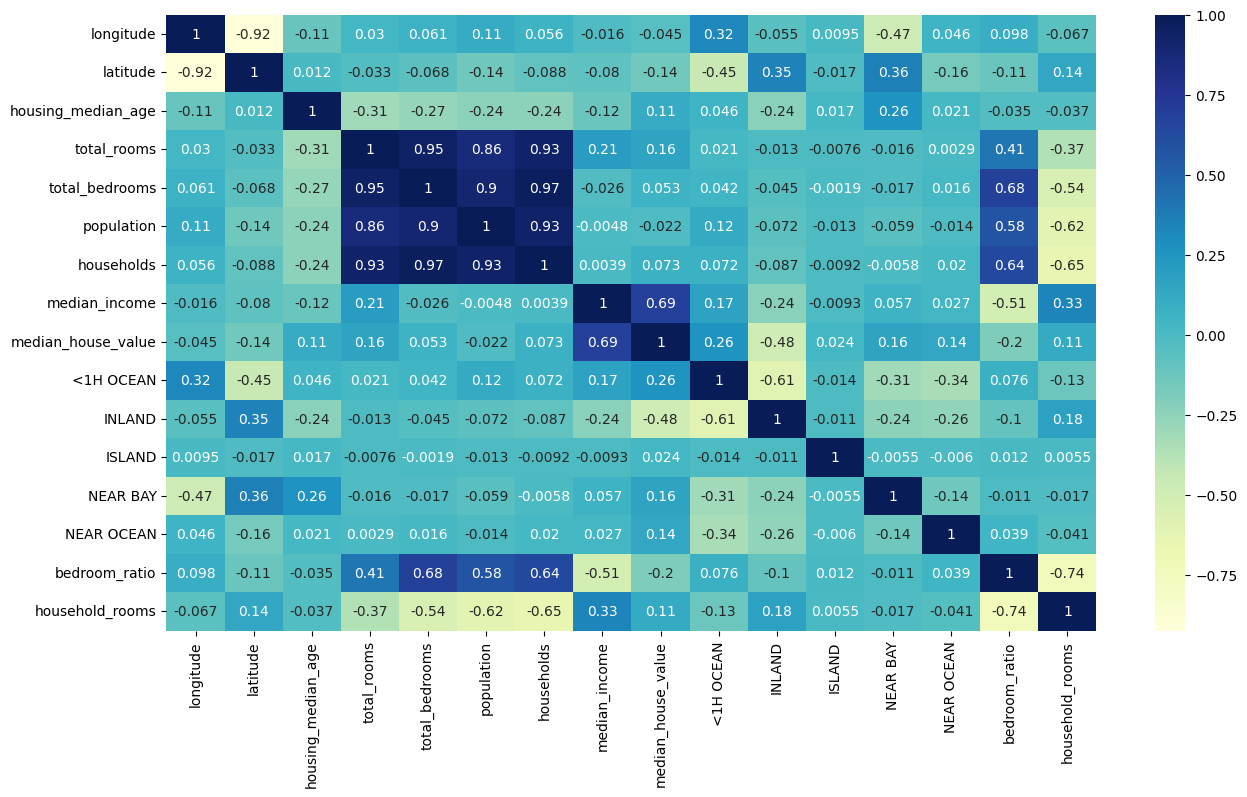

In [188]:
plt.figure(figsize=(15,8))
sns.heatmap(data_clean.corr(), annot=True, cmap="YlGnBu")

Nous voyons que le 'bedrooms_ratio' est inversement corrélé au 'median_house_value' ce qui veut dire que plus on a de chambres par rapport au nombre total de pièces moins la valeurs de la maison par rapport au nombre de pièces est élevé. Ce qui est compréhensible car si l'on possède 8 salles de bains, 3 salons et deux cuisines pour seulement deux chambres nous sommes sur une maison avec beaucoup de superflue et donc surement de grande valeur.

Nous allons maintenant commencer à développer nôtre premier modèle qui sera un modèle de Régression linéaire.

In [194]:
from sklearn.model_selection import train_test_split

X = data_clean.drop('median_house_value', axis=1)
y = data_clean['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [193]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(16346, 15) (4087, 15)
(16346,) (4087,)


Création du modèle puis entrainement :

In [196]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Evaluation :

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R² : {r2:.4f}")

R² : 0.6687


In [202]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Erreur quadratique moyenne (MSE) : {mse:.4f}")

Erreur quadratique moyenne (MSE) : 4530030653.7604


In [203]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Erreur absolue moyenne (MAE) : {mae:.4f}")


Erreur absolue moyenne (MAE) : 48660.7566


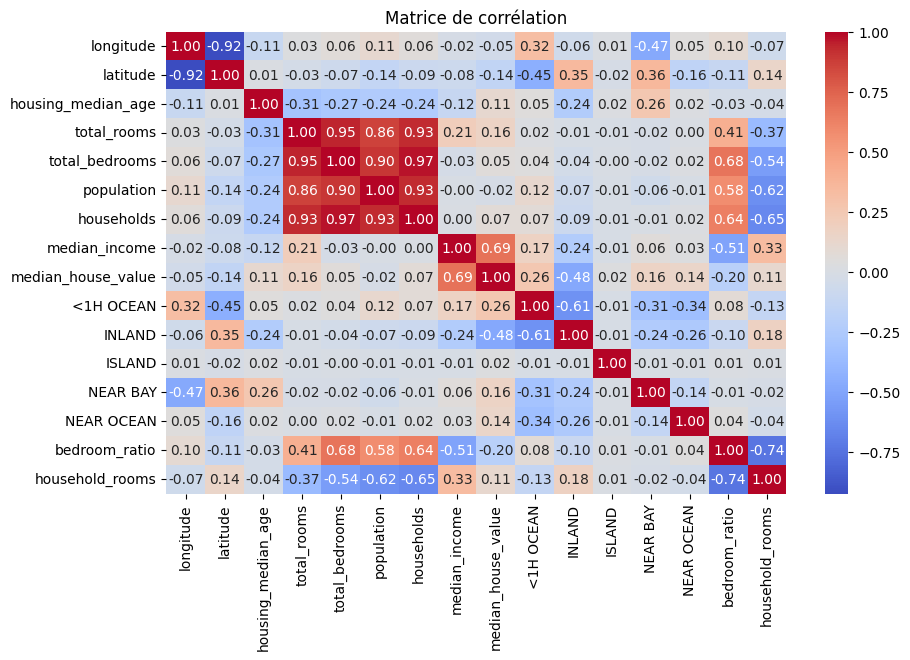

In [204]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer les corrélations
corr_matrix = data_clean.corr()

# Afficher une heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()


Les erreurs sont plutôt élevées même s'il sagit d'un modèle simple, nous allons réessayer avec seulement les variables les plus corrélées :

In [244]:
data_clean_2 = data_clean.drop(['total_bedrooms', 'total_rooms', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND','population', 'households'], axis=1)

X_2 = data_clean_2.drop('median_house_value', axis=1)
y_2 = data_clean_2['median_house_value']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

In [229]:
print(X_train_2.shape, X_test_2.shape)
print(y_train_2.shape, y_test_2.shape)

(16346, 12) (4087, 12)
(16346,) (4087,)


In [230]:
model.fit(X_train_2, y_train_2)

y_pred_2 = model.predict(X_test_2)

In [231]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_2, y_pred_2)
print(f"R² : {r2:.4f}")

mse = mean_squared_error(y_test, y_pred)
print(f"Erreur quadratique moyenne (MSE) : {mse:.4f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Erreur absolue moyenne (MAE) : {mae:.4f}")

R² : 0.6236
Erreur quadratique moyenne (MSE) : 5484333688.1643
Erreur absolue moyenne (MAE) : 53552.5097


Les erreurs sont définitivements trop importantes, nous allons essayer un modèle plus sofistiqué :

In [246]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=250, random_state=42)
rf.fit(X_train_2, y_train_2)
y_pred_rf = rf.predict(X_test_2)
print(f"R² (Random Forest): {r2_score(y_test_2, y_pred_rf):.4f}")


R² (Random Forest): 0.8182


C'est une nette amélioration

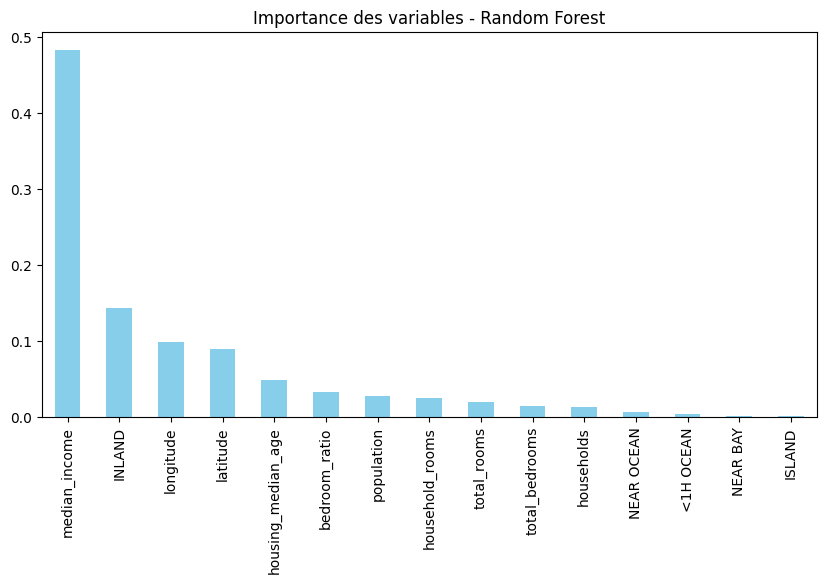

In [243]:
import pandas as pd
import matplotlib.pyplot as plt

# Importance des features
feature_importance = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), color="skyblue")

plt.title("Importance des variables - Random Forest")
plt.show()


In [247]:
from sklearn.model_selection import GridSearchCV

# Définir la grille d'hyperparamètres à tester
param_grid = {
    'n_estimators': [100, 250, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
rf_grid.fit(X_train, y_train)

print(f"Meilleur score R²: {rf_grid.best_score_:.4f}")
print(f"Meilleurs hyperparamètres: {rf_grid.best_params_}")


Meilleur score R²: 0.8073
Meilleurs hyperparamètres: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}


In [254]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=500, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print(f"R² (XGBoost): {r2_score(y_test, y_pred_xgb):.4f}")


R² (XGBoost): 0.8325


In [255]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

param_grid = {
    'n_estimators': [250, 500, 750],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1]
}

grid_search = GridSearchCV(
    XGBRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print(f"Meilleur R² : {grid_search.best_score_:.4f}")
print(f"Meilleurs hyperparamètres : {grid_search.best_params_}")


Meilleur R² : 0.8418
Meilleurs hyperparamètres : {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 750, 'subsample': 0.8}


Nous avons testé plusieurs modèles jusqu'à arriver à un score de performance >0,84 qui est plutôt satisfaisant.